# Regresión lineal simple

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('C:/Users/NoxiePC/Pictures/DATA/Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data = data.iloc[:, 1:]
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

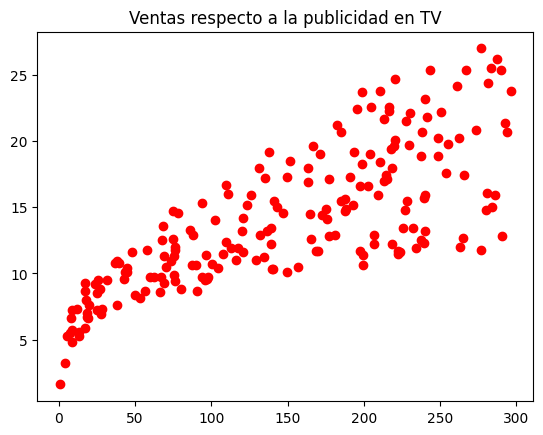

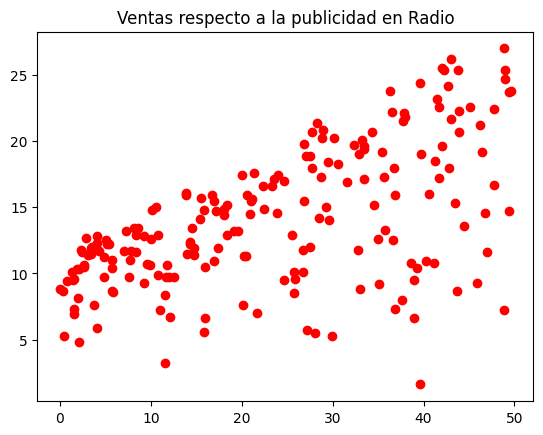

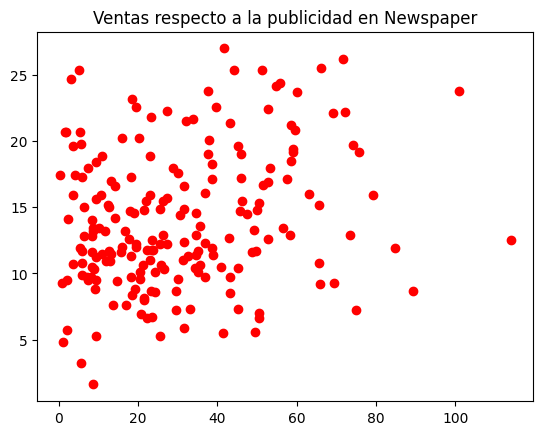

In [10]:
# Para conocer mejor los datos vamos a crear una gráfica para entender como están distribuidos los datos

cols = ['TV', 'Radio', 'Newspaper']

for col in cols:
    plt.plot(data[col], data['Sales'], 'ro')
    plt.title('Ventas respecto a la publicidad en %s' % col)
    plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [22]:
X = data['TV'].values.reshape(-1,1)
y = data['Sales'].values

In [24]:
# Dividir el conjunto de datos entre entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [27]:
print(X_train.shape)
print(X_test.shape)

(160, 1)
(40, 1)


In [30]:
y_pred = lin_reg.predict(X_test)


In [31]:
#¿Como saber que tan bueno es el modelo?
print('Predicciones: {}, Reales: {}'.format(y_pred[:4], y_test[:4]))

Predicciones: [14.71794394 16.2115484  20.74819743  7.66403631], Reales: [16.9 22.4 21.4  7.3]


In [32]:
#RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)
#R2
print('R2:', r2_score(y_test, y_pred))


RMSE: 3.194472431998898
R2: 0.6766954295627076


C:\Users\NoxiePC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


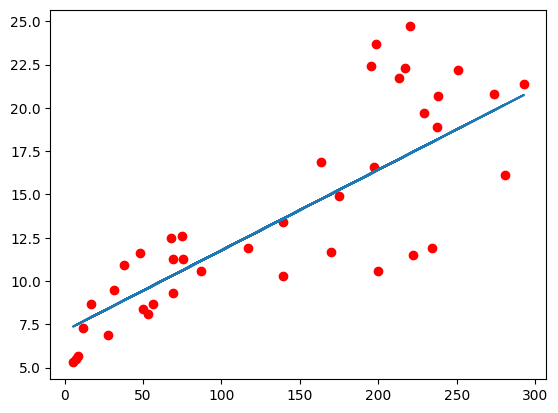

In [33]:
plt.plot(X_test, y_test, 'ro')
plt.plot(X_test, y_pred)
plt.show()

# Regresión lineal múltiple

### El modelo de regresión lineal SIMPLE es el más básico, ya que entiende una correlación entre variables que es lineal, si la independiente crece la variable dependiente también debe de crecer, es una correlación lineal. La regresión lineal múltiple tenemos más de una variable independiente y una dependiente, lo que quiere decir que al final del día la relación entre variables es más complicada porque le agregamos una variable extra por lo que la relación se hace más compleja.

# Regresión polinómica


In [10]:
pos = [x for x in range(1,11)]
post = ['Pasante de desarrollo',
        'Desarrollador junior',
        'Desarrollador intermedio',
        'Desarrollador senior',
        'Lider del proyecto',
        'Gerente del proyecto',
        'Arquitecto de software',
        'Director de desarrollo',
        'Director de tecnología',
        'Director ejecutivo']
salary = [1200.0, 2500.0, 4000.0, 6500.0, 9000.0, 12820.0, 15000.0, 25000.0, 50000.0, 60000.0]


In [11]:
data = {
    'position': post,
    'years': pos,
    'salary': salary
}

data = pd.DataFrame(data)
data.head()


,position,years,salary
0,Pasante de desarrollo,1,1200.0
1,Desarrollador junior,2,2500.0
2,Desarrollador intermedio,3,4000.0
3,Desarrollador senior,4,6500.0
4,Lider del proyecto,5,9000.0


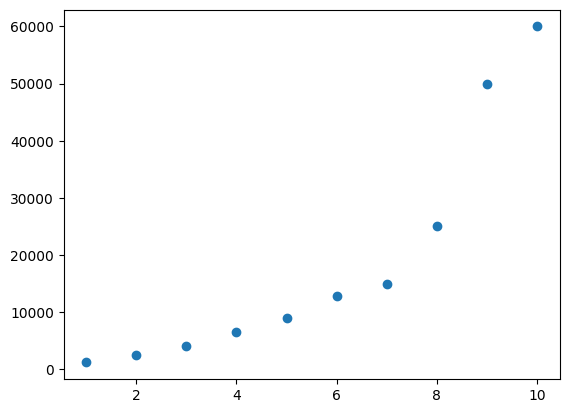

In [12]:
plt.scatter(data['years'], data['salary'])
plt.show()

### Si trazamos una recta vemos que hay muchos datos que quedan fuera del gráfico y no puede explicar, por lo que utilizar regresión lineal no es la mejor idea, debemos utilizar un modelo que nos permita entender el gráfico. 

In [13]:
X = data.iloc[:, 1].values.reshape(-1, 1)
y = data.iloc[:, -1].values

In [14]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X,y)


LinearRegression()

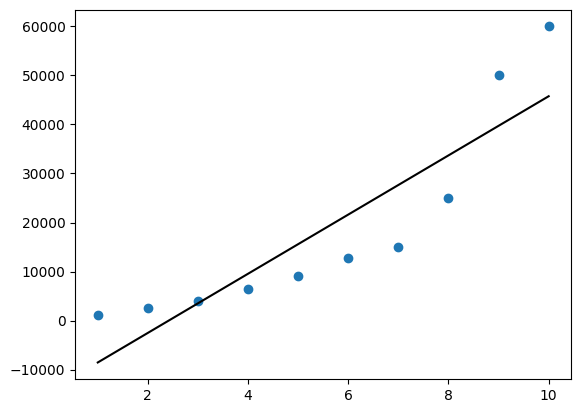

In [15]:
plt.scatter(data['years'], data['salary'])
plt.plot(X, regression.predict(X), color='black')
plt.show()

In [16]:
regression.predict([[2]])

array([-2525.6969697])

In [17]:
# Modelo polinómico
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [18]:
regression_2 = LinearRegression()
regression_2.fit(X_poly, y)

LinearRegression()

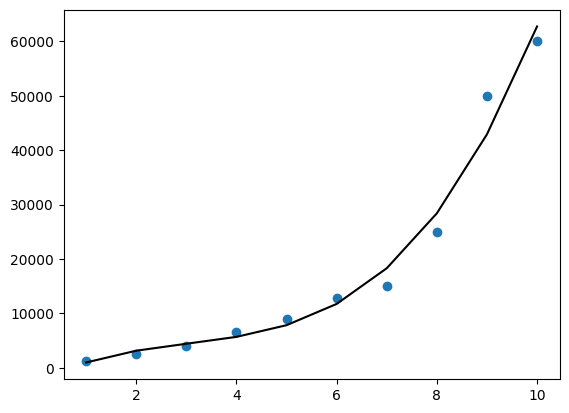

In [19]:
plt.scatter(data['years'], data['salary'])
plt.plot(X, regression_2.predict(X_poly), color='black')
plt.show()

In [20]:
predict = poly.fit_transform([[2]])
regression_2.predict(predict)




array([3130.27505828])

In [21]:
from sklearn.metrics import r2_score

y_pred = regression_2.predict(X_poly)
print(r2_score(y, y_pred))

0.9779062394355488


# Support vector machine

In [2]:
import pandas as pd

In [4]:
data = pd.read_csv('C:/Users/NoxiePC/Pictures/DATA/Advertising.csv')
data = data.iloc[:, 1:]

### La máquina de soporte vectorial tiene unas rectas que acompañan al hiperplano, a las rectas se las conoce como los vectores de soporte o apoyo, lo que conseguimos con la maquina de soporte, podemos conseguir tener un mejor entendimiento entre las variables.

In [6]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [7]:
X = data.drop(['Radio', 'Sales'], axis=1).values
y = data['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [9]:
y_pred = svr.predict(X_test)
print('Reales:', y_test, 'predicción', y_pred[:4])

Reales: [16.9 22.4 21.4  7.3 24.7 12.6 22.3  8.4 11.5 14.9  9.5  8.7 11.9  5.3
 10.3 11.7  5.5 16.6 11.3 18.9 19.7 12.5 10.9 22.2  9.3  8.1 21.7 13.4
 10.6  5.7 10.6 11.3 23.7  8.7 16.1 20.7 11.6 20.8 11.9  6.9] predicción [15.92644542 17.19547972 18.032271    8.22924309]


In [10]:
r2_score(y_test, y_pred)

0.6656952068341743

# California


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [8]:
data = pd.read_csv('C:/Users/NoxiePC/Pictures/DATA/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
data['ocean_proximity'].value_counts( )

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

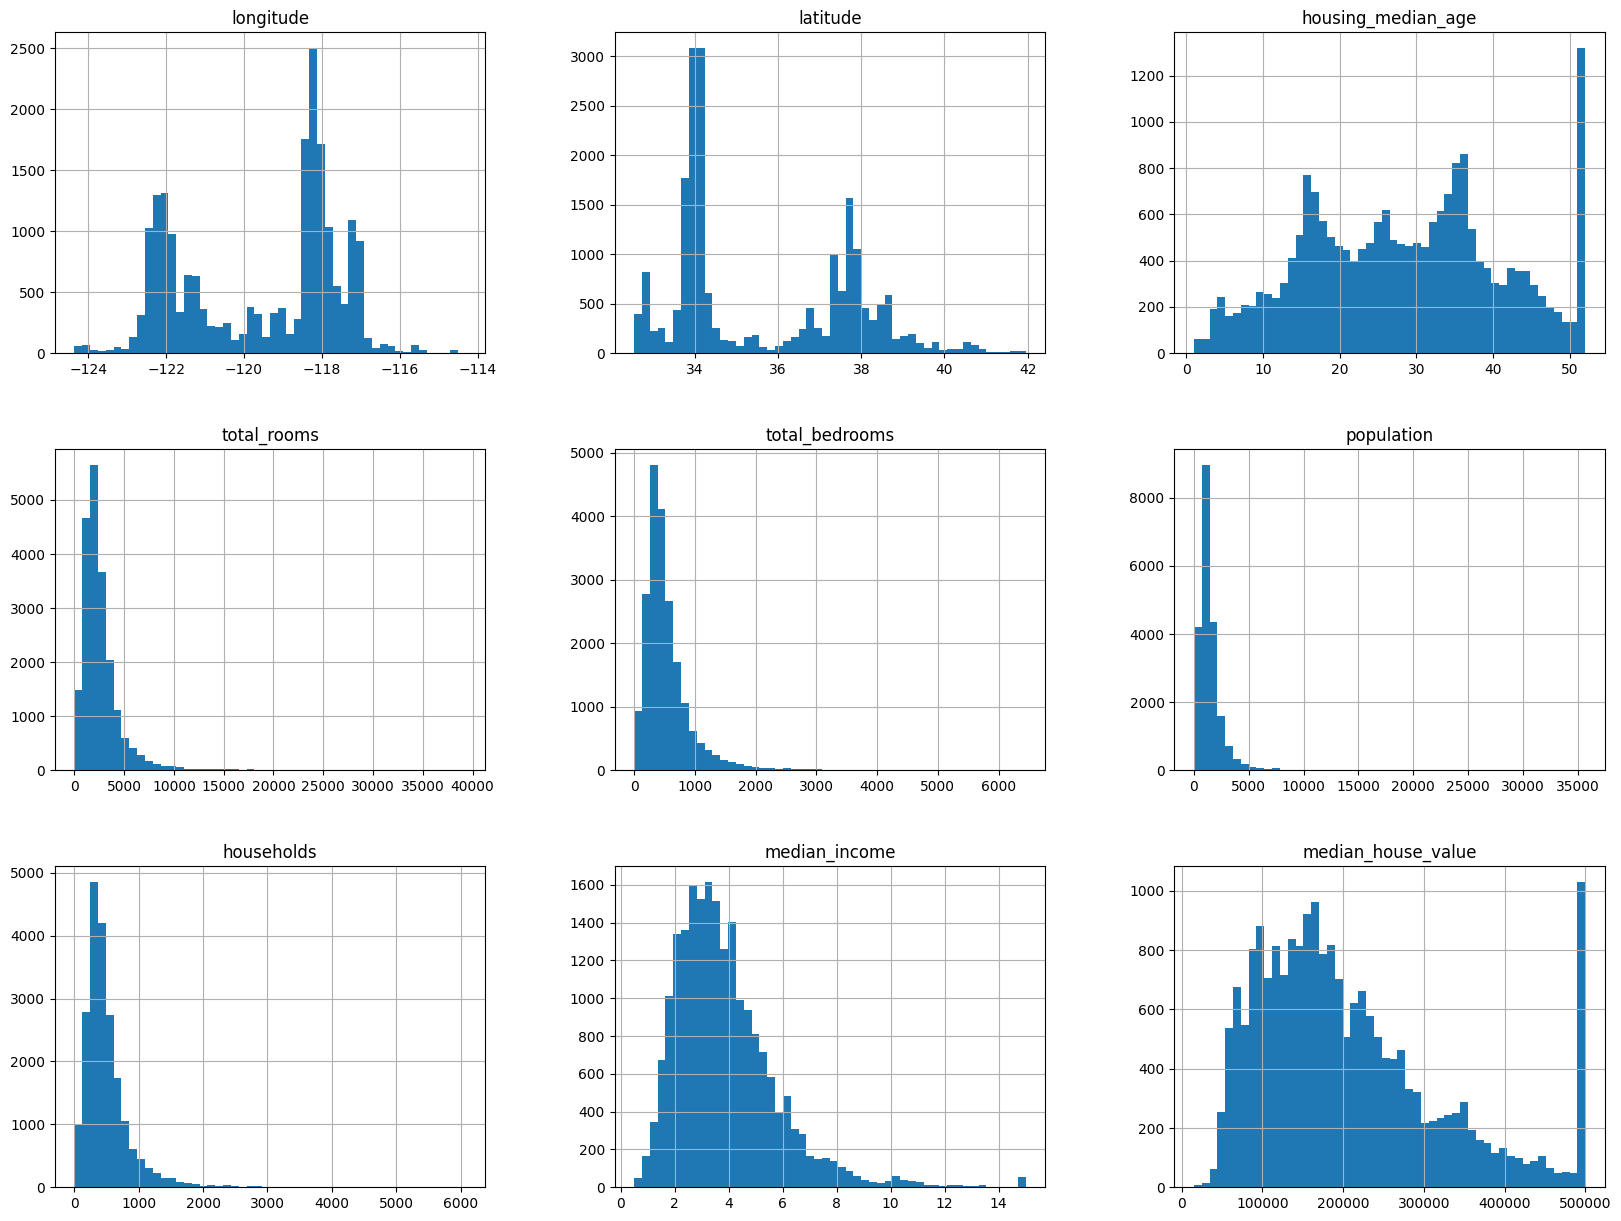

In [11]:
data.hist(bins=50, figsize=(20,15))

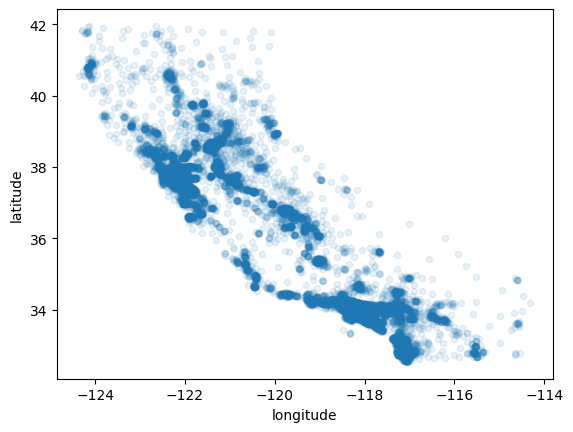

In [34]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
plt.show()

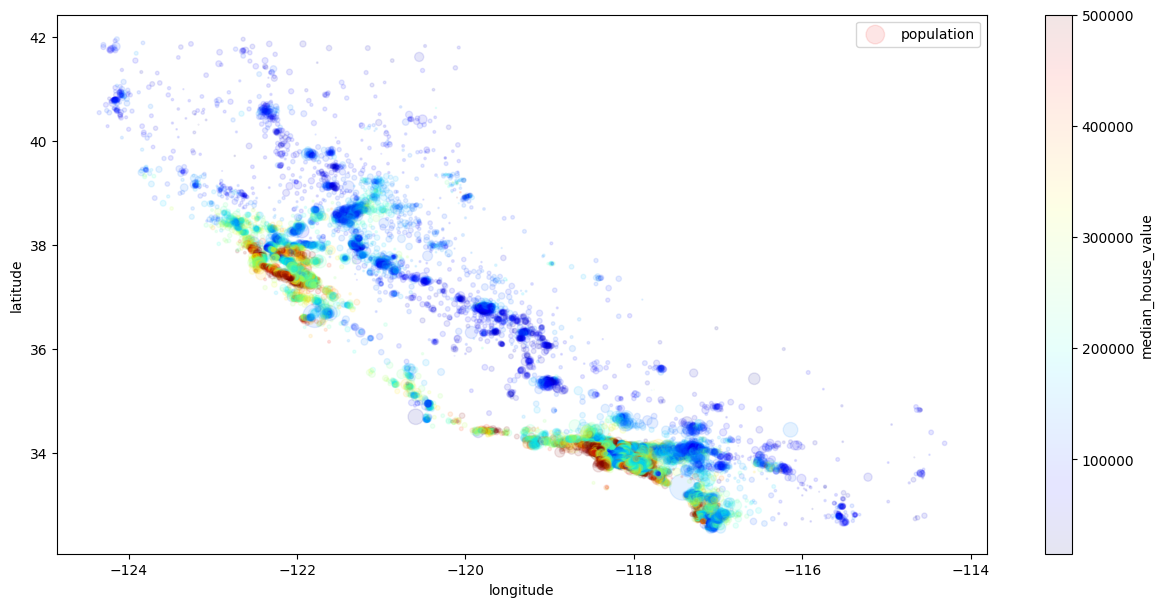

In [35]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1, s=data['population']/100, label='population',
          figsize=(15,7), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()


<Axes: >

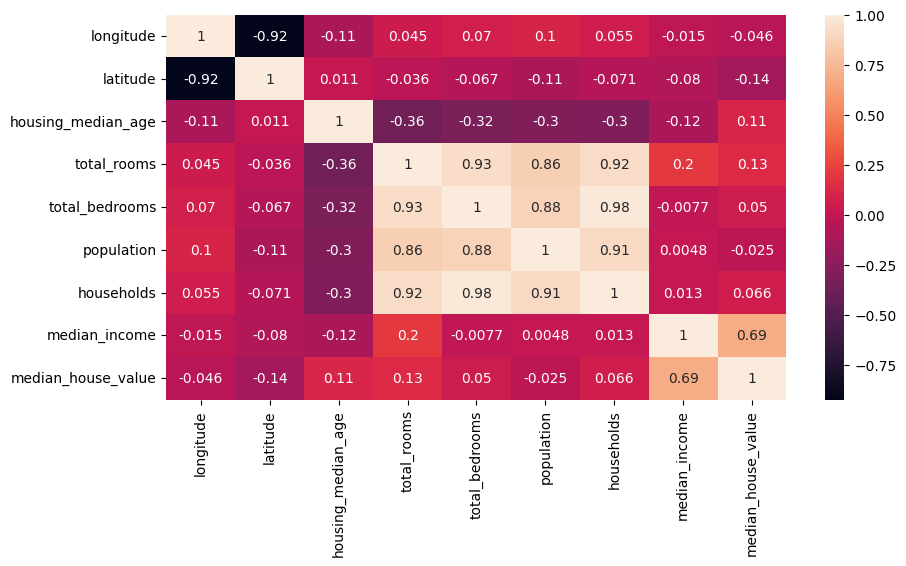

In [42]:
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_data.corr(), annot=True)


In [44]:
# Seleccionar solo columnas numéricas para calcular la matriz de correlación
numeric_data = data.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
corr_matrix = numeric_data.corr()

# Ordenar las correlaciones de 'median_house_value' en orden descendente
sorted_corr = corr_matrix['median_house_value'].sort_values(ascending=False)

# Mostrar los resultados
print(sorted_corr)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


### Combinación de atributos

In [2]:
import numpy as np
import pandas as pd

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [47]:
x = [1,2,3,np.nan]
x1 = pd.Series(x)

In [48]:
x1.mean()

2.0

In [50]:
x = [1,2,3,0]
x1 = pd.Series(x)
x1.mean()

1.5

In [20]:
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

C:\Users\NoxiePC\AppData\Local\Temp\ipykernel_2988\1676755818.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [22]:
# Manipulación de los datos categoricos
from sklearn.preprocessing import OrdinalEncoder
data_ocean = data[['ocean_proximity']]
ordinal_encoder = OrdinalEncoder()
data_ocean_encoded = ordinal_encoder.fit_transform(data_ocean)

In [23]:
np.random.choice(data_ocean_encoded.ravel(), size=10)

array([1., 0., 0., 3., 0., 0., 4., 0., 1., 0.])

In [24]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_ocean)




In [25]:
data_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [26]:
encoded_df = pd.DataFrame(data_cat_1hot.toarray(), columns= cat_encoder.get_feature_names_out())
encoded_df.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [27]:
# Variables dependientes e independientes
y = data['median_house_value'].values.reshape(-1,1)

In [28]:
X = data[[
    'median_income',
    'total_rooms',
    'housing_median_age',
    'households'
]]



In [29]:
data1 = pd.concat([X, encoded_df], axis=1) # En axis 0 para filas, 1 para columnas
data1.columns


Index(['median_income', 'total_rooms', 'housing_median_age', 'households',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [30]:
X = data1.values
X[:10]

array([[8.3252e+00, 8.8000e+02, 4.1000e+01, 1.2600e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
       [8.3014e+00, 7.0990e+03, 2.1000e+01, 1.1380e+03, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
       [7.2574e+00, 1.4670e+03, 5.2000e+01, 1.7700e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
       [5.6431e+00, 1.2740e+03, 5.2000e+01, 2.1900e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
       [3.8462e+00, 1.6270e+03, 5.2000e+01, 2.5900e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
       [4.0368e+00, 9.1900e+02, 5.2000e+01, 1.9300e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
       [3.6591e+00, 2.5350e+03, 5.2000e+01, 5.1400e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
       [3.1200e+00, 3.1040e+03, 5.2000e+01, 6.4700e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],


### Regresión lineal múltiple

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
print(X_train.shape)
print(y_train.shape)

(16512, 9)
(16512, 1)


In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = lin_reg.predict(X_test)

In [36]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.6108807864451389

In [37]:
data1.head()

,median_income,total_rooms,housing_median_age,households,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,8.3252,880.0,41.0,126.0,0.0,0.0,0.0,1.0,0.0
1,8.3014,7099.0,21.0,1138.0,0.0,0.0,0.0,1.0,0.0
2,7.2574,1467.0,52.0,177.0,0.0,0.0,0.0,1.0,0.0
3,5.6431,1274.0,52.0,219.0,0.0,0.0,0.0,1.0,0.0
4,3.8462,1627.0,52.0,259.0,0.0,0.0,0.0,1.0,0.0


In [38]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X = sc_X.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2


0.5942924867259357

In [42]:
columnas = ['median_income','total_rooms','housing_median_age','households', 'latitude', 'longitude']
col_modelo = []
y = data['median_house_value'].values.reshape(-1, 1)
for col in columnas:
    col_modelo.append(col)
    data1 = data[col_modelo]
    data1 = pd.concat([data1, encoded_df], axis=1)
    X = data1.values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print('Columnnas:', col_modelo, 'calificación: ', r2)

Columnnas: ['median_income'] calificación:  0.5837620500275742
Columnnas: ['median_income', 'total_rooms'] calificación:  0.6101242633618573
Columnnas: ['median_income', 'total_rooms', 'housing_median_age'] calificación:  0.5980228923943616
Columnnas: ['median_income', 'total_rooms', 'housing_median_age', 'households'] calificación:  0.618762478276901
Columnnas: ['median_income', 'total_rooms', 'housing_median_age', 'households', 'latitude'] calificación:  0.6064912478263309
Columnnas: ['median_income', 'total_rooms', 'housing_median_age', 'households', 'latitude', 'longitude'] calificación:  0.6184332930402907


# Regresión con Arboles y Bosques Aleatorios


In [43]:
from sklearn.tree import DecisionTreeRegressor


In [44]:
columnas = ['median_income','total_rooms','housing_median_age','households', 'latitude', 'longitude']
col_modelo = []
y = data['median_house_value'].values.reshape(-1, 1)
for col in columnas:
    col_modelo.append(col)
    data1 = data[col_modelo]
    data1 = pd.concat([data1, encoded_df], axis=1)
    X = data1.values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    tree_reg = DecisionTreeRegressor()
    tree_reg.fit(X_train, y_train)
    y_pred = tree_reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print('Columnnas:', col_modelo, 'calificación: ', r2)

Columnnas: ['median_income'] calificación:  0.28867111966386994
Columnnas: ['median_income', 'total_rooms'] calificación:  0.1932291789781878
Columnnas: ['median_income', 'total_rooms', 'housing_median_age'] calificación:  0.283607198903006
Columnnas: ['median_income', 'total_rooms', 'housing_median_age', 'households'] calificación:  0.35094746646667874
Columnnas: ['median_income', 'total_rooms', 'housing_median_age', 'households', 'latitude'] calificación:  0.47935421553327473
Columnnas: ['median_income', 'total_rooms', 'housing_median_age', 'households', 'latitude', 'longitude'] calificación:  0.6382143819407596


In [45]:
from sklearn.ensemble import RandomForestRegressor


In [46]:
columnas = ['median_income','total_rooms','housing_median_age','households', 'latitude', 'longitude']
col_modelo = []
y = data['median_house_value'].values.reshape(-1, 1)
for col in columnas:
    col_modelo.append(col)
    data1 = data[col_modelo]
    data1 = pd.concat([data1, encoded_df], axis=1)
    X = data1.values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    forest_reg = RandomForestRegressor()
    forest_reg.fit(X_train, y_train)
    y_pred = forest_reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print('Columnnas:', col_modelo, 'calificación: ', r2)

C:\Users\NoxiePC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Columnnas: ['median_income'] calificación:  0.46030820560506736


C:\Users\NoxiePC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Columnnas: ['median_income', 'total_rooms'] calificación:  0.5469101019277769


C:\Users\NoxiePC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Columnnas: ['median_income', 'total_rooms', 'housing_median_age'] calificación:  0.6164138034230582


C:\Users\NoxiePC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Columnnas: ['median_income', 'total_rooms', 'housing_median_age', 'households'] calificación:  0.6462050056008788


C:\Users\NoxiePC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Columnnas: ['median_income', 'total_rooms', 'housing_median_age', 'households', 'latitude'] calificación:  0.7191658269497416


C:\Users\NoxiePC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Columnnas: ['median_income', 'total_rooms', 'housing_median_age', 'households', 'latitude', 'longitude'] calificación:  0.8194400478510183


# Algoritmos de clasificación

In [47]:
import numpy as np
import matplotlib.pyplot as plt


In [48]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [49]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [50]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


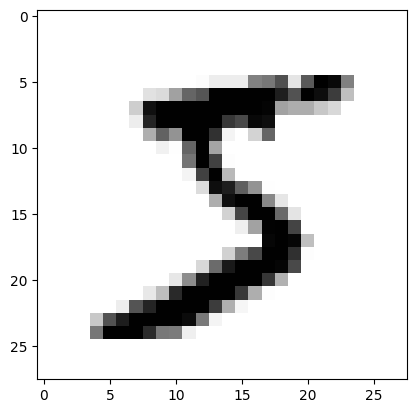

In [51]:
digit = X.to_numpy()[0]
digit_image = digit.reshape(28,28)

plt.imshow(digit_image, cmap='binary')
plt.show()

In [52]:
y = y.astype(np.uint8)
y[0]

5

In [53]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [54]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [55]:
#SDGClassifier
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [56]:
sgd_classifier.predict([digit])

C:\Users\NoxiePC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [57]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_classifier, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [58]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3)

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [61]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

# Regresión logística

### La regresión logistica parte de la regresión lineal simple, pero en la regresión logística encontramos una ecuación que se conoce como: SIGMOIDE. Nos da una probabilidad de que suceda una cosa o no (problemas binarios). Solo hay dos posibles respuestas. 

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('C:/Users/NoxiePC/Pictures/DATA/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
X = data.iloc[:, [2,3]]
y = data.iloc[:, 1].values

In [7]:
gender = data[['Gender']]

In [8]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(gender)

In [9]:
cat_encoder.categories_

[array(['Female', 'Male'], dtype=object)]

In [10]:
data_cat_1hot
data_cat_1hot.toarray()[:3]

array([[0., 1.],
       [0., 1.],
       [1., 0.]])

In [11]:
encoded_df = pd.DataFrame(data_cat_1hot.toarray(), columns = cat_encoder.get_feature_names_out())
encoded_df.head()

,Gender_Female,Gender_Male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [12]:
data1 = pd.concat([X, encoded_df], axis=1)
data1.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0.0,1.0
1,35,20000,0.0,1.0
2,26,43000,1.0,0.0
3,27,57000,1.0,0.0
4,19,76000,0.0,1.0


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1, y, test_size=0.2, random_state=0)



In [14]:
print(X_train.shape)
print(X_test.shape)

(320, 4)
(80, 4)


In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [17]:
y_pred = log_reg.predict(X_test)

In [18]:
print('Reales:', y_test[:10], 'Predicción', y_pred[:10])

Reales: ['Male' 'Female' 'Male' 'Female' 'Female' 'Male' 'Female' 'Male' 'Female'
 'Male'] Predicción ['Male' 'Female' 'Male' 'Female' 'Female' 'Male' 'Female' 'Male' 'Female'
 'Male']


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[40,  0],
       [ 0, 40]], dtype=int64)

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Suponiendo que 'Female' es tu clase positiva, especifica pos_label='Female'
print('Precisión:', precision_score(y_test, y_pred, pos_label='Female'))
print('Memoria:', recall_score(y_test, y_pred, pos_label='Female'))
print('F1-score:', f1_score(y_test, y_pred, pos_label='Female'))


ValueError: pos_label=1 is not a valid label. It should be one of ['Female', 'Male']